# Lösungen Kapitel 5

# Aufgabenteil 1

## 1.1

In [1]:
def length(sequence):
    """Gibt Länge eines sequentiellen Datentyps zurück."""
    
    # Zählvariable
    length = 0
    
    # für jedes Element in Sequenz (z.B. Liste)
    for element in sequence:
        # Zählvariable um 1 erhöhen
        length += 1
    
    # Zählvariable ausgeben
    return length

In [2]:
test_list = [4,23,[1,2,], "hallo"]

list_length = length(test_list)

print(list_length)

4


## 1.2

In [3]:
def change(price, paid):
    """Berechnet Wechselgeld und gibt den Wert zurück."""
    
    # Differenz berechnen und ausgeben
    return paid - price

In [4]:
my_change = change(99, 100)

print(my_change)

1


## 1.3

In [5]:
def coins(cents):
    """
    Übersetzt einen eingegeben Betrag an Cents in die gleichwertige Anzahl an 5-, 2- und 1-Cent-Münzen.
    Die Gesamtanzahl an Münzen wird dabei minimiert.
    """
    
    # zählt, wie viele Cents bereits in Cent-Münzen "übersetzt" wurden
    counter = 0
    
    # zählen die Anzahl der jeweils benötigten Münzen
    cent5_counter = 0
    cent2_counter = 0
    cent1_counter = 0
    
    # For-Loop, der mindestens so lange läuft, wie Cents eingegeben wurden
    # Hier hätte man eigentlich am 
    for i in range(cents):
        
        # Wie viele Cents noch in Münzen übersetzt werden müssen
        difference = cents - counter
        
        # Wenn noch 5 oder mehr Cents in Münzen übersetzt werden müssen
        if difference >= 5:
            # Anzahl der 5-Cent-Münzen um 1 erhöhen
            cent5_counter += 1
            # Anzahl der schon in Münzen übersetzte Cents um 5 erhöhen
            counter += 5
        
        # Wenn noch 2 oder mehr (bzw. 2 bis 4) Cents in Münzen übersetzt werden müssen
        elif difference >= 2:
            # Anzahl der 2-Cent-Münzen um 1 erhöhen
            cent2_counter += 1
            # Anzahl der schon in Münzen übersetzte Cents um 2 erhöhen
            counter += 2
        
        # Wenn noch 1 Cent in Münzen übersetzt werden müssen
        elif difference == 1:
            # Anzahl der 1-Cent-Münzen um 1 erhöhen
            cent1_counter += 1
            # Anzahl der schon in Münzen übersetzte Cents um 1 erhöhen
            counter += 1
        
        # Ansonsten:
        else:
            # Loop abbrechen
            break
    
    # Ergebnisse "schön" darstellen und in der Konsole anzeigen
    print(
        "5-Cent:", cent5_counter, 
        "2-Cent:", cent2_counter, 
        "1-Cent:", cent1_counter,
         )     

In [6]:
coins(34)

5-Cent: 6 2-Cent: 2 1-Cent: 0


# Aufgabenteil 2

## Modell 1 (vorgegeben)

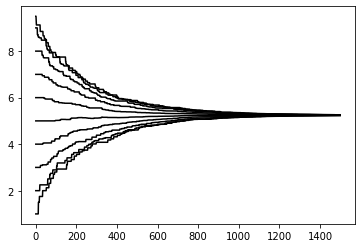

In [12]:
import random
from matplotlib import pyplot as plt

def get_weights_1(population, focal_position):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 1."""
    
    # Gewichts-Liste
    weights = []
    
    # für jede Position in Population
    for j in range(len(population)):
        
        # Distanz zwischen Position des fokalen Agenten i und des Agenten j berechnen
        distance = abs(j - focal_position)
        
        # Wenn Distanz kleiner gleich 1
        if distance <= 1:
            # Gewicht von 1 an Gewichts-Liste hängen
            weights.append(1)
        # Ansonsten:
        else:
            # Gewicht von 0 an Gewichts-Liste hängen
            weights.append(0)
    
    # Gewichts-Liste ausgeben
    return weights


def calculate_opinion_change(population, focal_position, weights):
    
    """Berechnet die Meinungsveränderung des fokalen Agenten i nach der Beeinflussung durch die Population."""
    
    ############################################################
    # Oberhalb des Bruchstriches
    ############################################################
    
    # Meinung des fokalen Agenten i ermitteln
    opinion_focal_agent = population[focal_position]
    
    # Liste für die gewichteten Meinungsunterschiede, die später aufsummiert werden
    weighted_diffs = []
    
    # Für jede Position in Population
    for j in range(len(population)):
        
        # Meinung des Agenten j ermitteln
        opinion_agent_j = population[j]
        
        # Meinungsdifferenz berechnen
        difference = opinion_agent_j - opinion_focal_agent
        
        # Meinungsdifferenz mit entsprechendem Gewicht aus Gewichts-Liste gewichten
        weighted_diff = difference * weights[j]
        
        # gewichtete Meinungsdifferenz an entsprechende Liste anhängen
        weighted_diffs.append(weighted_diff)
    
    # gewichtete Meinungsunterschiede aufsummieren
    sum_of_weighted_diffs = sum(weighted_diffs)
    
    
    ############################################################
    # Unterhalb des Bruchstriches
    ############################################################
    
    # Achtung: Fehler in Formel in Original-Text
    # Es muss korrekterweise die Summe der Beträge der Gewichte berechnet werden
    
    # Liste für absolute Beträge der Gewichte
    abs_weights = []
    
    # für jedes Gewicht in weights
    for w in weights:
        # absoluten Betrag des Gewichts an abs_weights hängen
        abs_weights.append(abs(w))
    
    # Summe der absoluten Gewichte ermitteln
    sum_of_abs_weights = sum(abs_weights)
    
    
    ############################################################
    # Dividieren / Durchschnitt berechnen
    ############################################################
    
    # Meinungsveränderung berechnen
    opinion_change = sum_of_weighted_diffs / sum_of_abs_weights
    
    # Meinungsveränderung ausgeben
    return opinion_change


def run_model_1():

    """Modell mit Beeinflussung durch direkte Nachbarn. Reproduziert Modell 1 in Mäs 2015. """
    
    #############################################################
    # Initialisierung
    #############################################################

    # Population erstellen
    population = []
    for i in range(1, 11):
        population.append(i)


    # Liste für Sammlung der Output-Daten erstellen
    opinion_history = []
    for i in range(len(population)):
        opinion_history.append([])


    #############################################################
    # Simulationsloop
    #############################################################

    # für 1500 Zeitschritte
    for t in range(1500):

        # zufälligen Index ziehen
        focal_position = random.choice(list(range(len(population))))

        # Gewichte ermitteln
        weights = get_weights_1(population, focal_position)

        # Meinungsveränderung berechnen
        opinion_change = calculate_opinion_change(population, focal_position, weights)

        # Meinung verändern / neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
        new_opinion = population[focal_position] + opinion_change

        # Alte Meinung durch neue Meinung in Population ersetzen
        population[focal_position] = new_opinion

        # Für jede Position in Population
        for j in range(len(population)):
            # An die opinion_history-Unterliste an Position j die Meinung des Agenten j hängen
            opinion_history[j].append(population[j])
    
    
    # Output-Daten plotten
    for opinion_data in opinion_history:
        plt.plot(opinion_data, color = "black")
    plt.show()

run_model_1()

## 2.2 - Modell 2

In [8]:
def get_weights_2(population, focal_position):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 2."""
    
    # Liste für Gewichte
    weights = []
    
    # für jeden Agenten bzw. jede Position in Population
    for j in range(len(population)):
        
        # Absoluten Meinungsunterschied (nicht Positionsunterschied wie in Modell 1) berechnen
        abs_diff = abs(population[j] - population[focal_position])
        
        # Wenn Meinungsunterschied kleinergleich Grenzwert
        if abs_diff <= 0.2:
            # Gewicht von 1 anhängen
            weights.append(1)
        
        # Ansonsten: 
        else:
            # Gewicht von 0 anhängen
            weights.append(0)
    
    # Liste der Gewichte ausgeben
    return weights


def run_model_2():

    """Modell mit Beeinflussung durch ähnliche Agenten. Reproduziert Modell 2 in Mäs 2015. """
    
    #############################################################
    # Initialisierung
    #############################################################
    
    # Population erstellen
    population = []
    for i in range(100):
        agent = random.random()
        population.append(agent)


    # Liste für Sammlung der Output-Daten erstellen
    opinion_history = []
    for i in range(len(population)):
        opinion_history.append([])


    #############################################################
    # Simulationsloop
    #############################################################

    # für 1000 Zeitschritte
    for t in range(1000):

        # zufälligen Index ziehen
        focal_position = random.choice(list(range(len(population))))
        
        # Gewichte ermitteln
        weights = get_weights_2(population, focal_position)

        # Meinungsveränderung berechnen
        opinion_change = calculate_opinion_change(population, focal_position, weights)

        # Meinung verändern / neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
        new_opinion = population[focal_position] + opinion_change

        # Alte Meinung durch neue Meinung in Population ersetzen
        population[focal_position] = new_opinion

        # Für jede Position in Population
        for j in range(len(population)):
            # An die opinion_history-Unterliste an Position j die Meinung des Agenten j hängen
            opinion_history[j].append(population[j])
    
    
    # Output-Daten plotten
    for opinion_data in opinion_history:
        plt.plot(opinion_data, color = "black")
    plt.show()

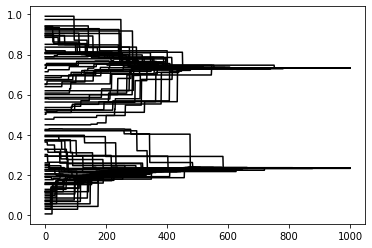

In [9]:
run_model_2()

## 2.3 - Modell 3

In [10]:
def get_weights_3(population, focal_position):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 3."""
    
    # Liste für Gewichte
    weights = []
    
    # für jeden Agenten bzw. jede Position in Population
    for j in range(len(population)):
        
        # absoluten Meinungsunterschied berechnen
        abs_diff = abs(population[j] - population[focal_position])
        
        
        """Anmerkung zu Gewichten:
        Die Gewichte werden nun auf einen kontinuierlichen Bereich zwischen -1 bis 1 skaliert.
        Meinungsunterschiede von >0.5 bis 1 führen zu Gewichten von <0 bis -1.
        Meinungsunterschiede von 0 bis 0.5 führen zu Gewichten von 1 bis 0,
        """
        
        # Wenn Meinungsunterschied größer Grenzwert
        if abs_diff > 0.5:
            # negatives Gewicht anhängen
            w = -1 * (2 * abs_diff - 1)
       
        # ansonsten:
        else:
            # positives Gewicht anhängen
            w = (1 - 2 * abs_diff)
        
        # Gewicht anhängen
        weights.append(w)
    
    # Liste der Gewichte ausgeben
    return weights


def run_model_3():

    """Modell mit negativer Beeinflussung. Reproduziert Modell 3 in Mäs 2015. """
    
    #############################################################
    # Initialisierung
    #############################################################

    # Population erstellen
    population = []
    for i in range(100):
        agent = random.random()
        population.append(agent)


    # Liste für Sammlung der Output-Daten erstellen
    opinion_history = []
    for i in range(len(population)):
        opinion_history.append([])


    #############################################################
    # Simulationsloop
    #############################################################

    # für 1000 Zeitschritte
    for t in range(1000):

        # zufälligen Index ziehen
        focal_position = random.choice(list(range(len(population))))

        # Gewichte ermitteln
        weights = get_weights_3(population, focal_position)

        # Meinungsveränderung berechnen
        opinion_change = calculate_opinion_change(population, focal_position, weights)

        # Meinung verändern / neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
        new_opinion = population[focal_position] + opinion_change
        
        # Meinung in zulässigem Bereich halten
        if new_opinion < 0:
            new_opinion = 0
        elif new_opinion > 1:
            new_opinion = 1

        # Alte Meinung durch neue Meinung in Population ersetzen
        population[focal_position] = new_opinion

        # Für jede Position in Population
        for j in range(len(population)):
            # An die opinion_history-Unterliste an Position j die Meinung des Agenten j hängen
            opinion_history[j].append(population[j])
    
    
    # Output-Daten plotten
    for opinion_data in opinion_history:
        plt.plot(opinion_data, color = "black")
    plt.show()

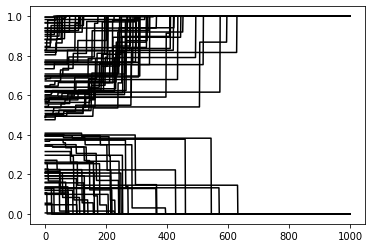

In [11]:
run_model_3()